In [41]:
#Basic Data Analysis & Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Data Spliting & Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Advance Data Processing & Hyperparameter Optimization
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

#Warnings
import warnings
warnings.filterwarnings ('ignore')

In [42]:
df = pd.read_csv('/Users/imranfarid/Desktop/Python_Files/weather_history_bangladesh.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    2917 non-null   object 
 1   time                    2917 non-null   object 
 2   temperature_fahrenheit  2917 non-null   int64  
 3   dew_point_fahrenheit    2917 non-null   int64  
 4   humidity_percentage     2917 non-null   object 
 5   wind                    2914 non-null   object 
 6   wind_speed_mph          2917 non-null   int64  
 7   wind_gust_mph           2917 non-null   int64  
 8   pressure_in             2917 non-null   float64
 9   precip._in              2917 non-null   int64  
 10  condition               2917 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 250.8+ KB


In [44]:
df.head()
display(df)


,date,time,temperature_fahrenheit,dew_point_fahrenheit,humidity_percentage,wind,wind_speed_mph,wind_gust_mph,pressure_in,precip._in,condition
0,1/1/23,0:00:00,66,59,78,CALM,0,0,30.06,0,Fog
1,1/1/23,0:30:00,66,59,78,CALM,0,0,30.03,0,Fog
2,1/1/23,1:00:00,66,61,83,CALM,0,0,30.03,0,Fog
3,1/1/23,1:30:00,64,61,88,CALM,0,0,30.03,0,Fog
4,1/1/23,2:00:00,64,61,88,CALM,0,0,30.03,0,Fog
...,...,...,...,...,...,...,...,...,...,...,...
2912,6/30/2022,21:30:00,82,77,84,SSE,6,0,29.56,0,Haze
2913,6/30/2022,22:00:00,82,77,84,SSE,6,0,29.56,0,Haze
2914,6/30/2022,22:30:00,82,75,79,SE,5,0,29.56,0,Haze
2915,6/30/2022,23:00:00,82,75,79,SE,5,0,29.56,0,Haze


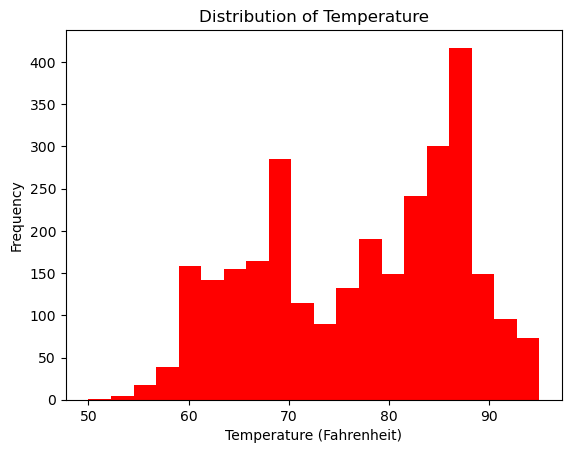

In [95]:
plt.hist(df['temperature_fahrenheit'], bins=20, color='red')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.show()

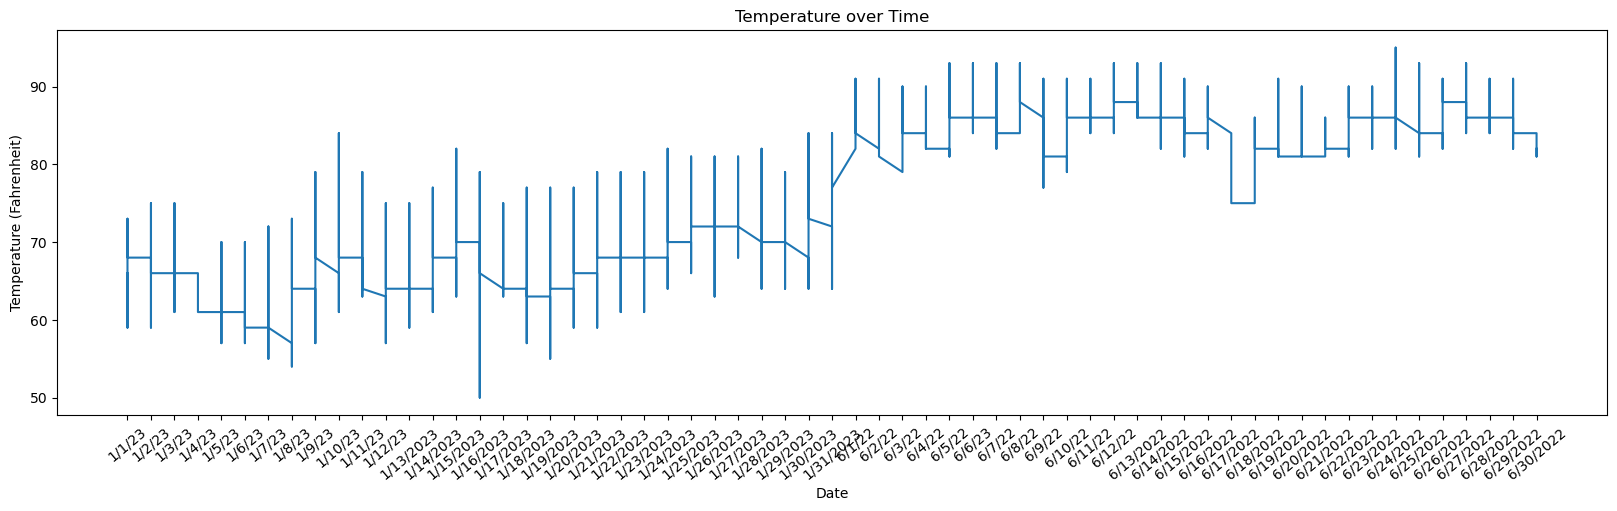

In [90]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], df['temperature_fahrenheit'])
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.xticks(rotation=40)
plt.show()

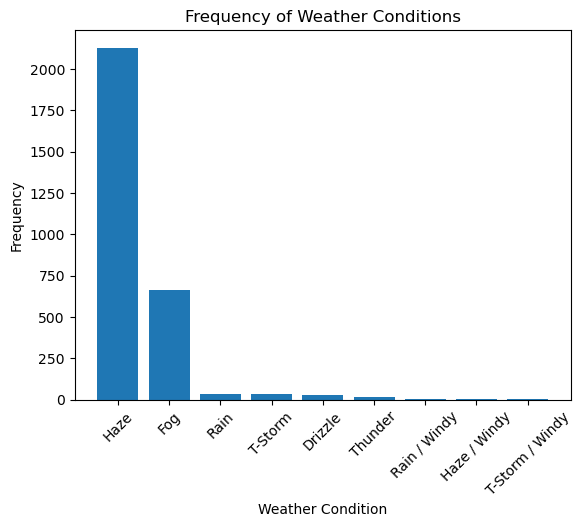

In [47]:
plt.bar(df['condition'].value_counts().index, df['condition'].value_counts().values)
plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

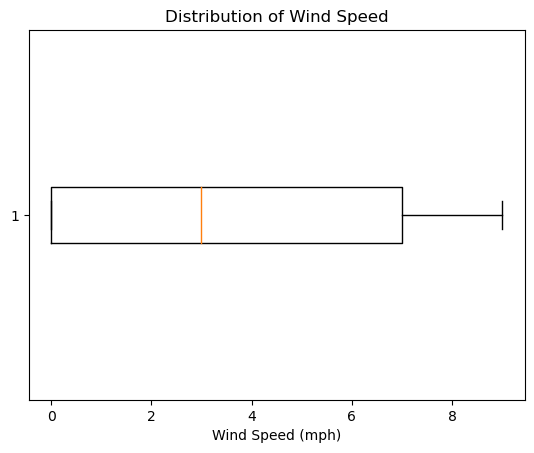

In [48]:
plt.boxplot(df['wind_speed_mph'], vert=False)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.show()

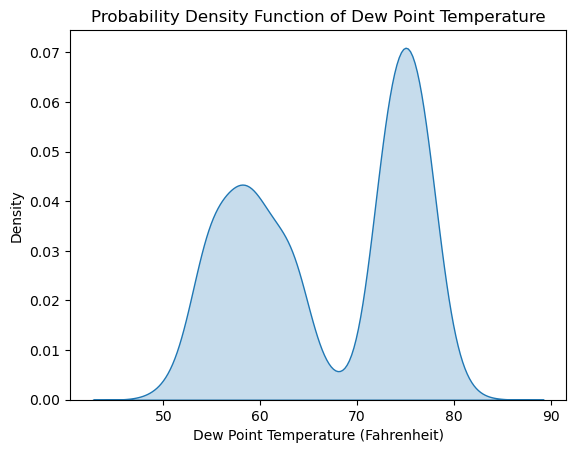

In [49]:
sns.kdeplot(df['dew_point_fahrenheit'], shade=True)
plt.title('Probability Density Function of Dew Point Temperature')
plt.xlabel('Dew Point Temperature (Fahrenheit)')
plt.show()

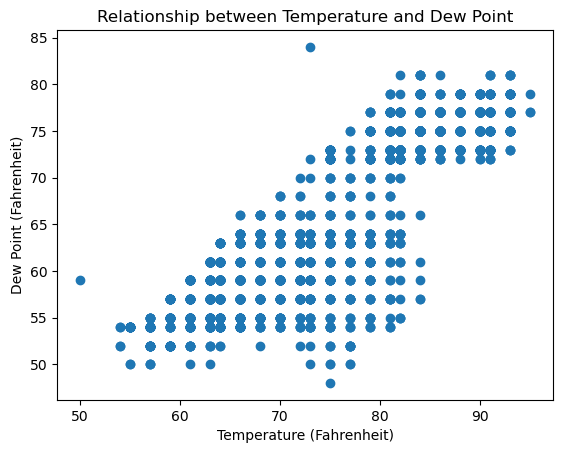

In [50]:
plt.scatter(df['temperature_fahrenheit'], df['dew_point_fahrenheit'])
plt.title('Relationship between Temperature and Dew Point')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Dew Point (Fahrenheit)')
plt.show()

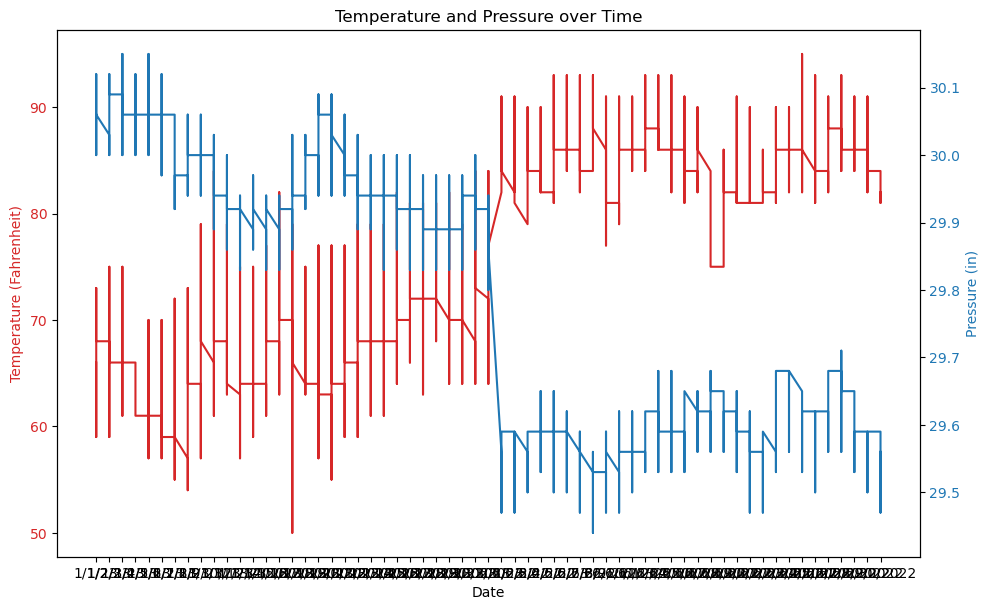

In [99]:
fig, ax1 = plt.subplots(figsize=(10, 6)) # set figsize to (width, height)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (Fahrenheit)', color=color)
ax1.plot(df['date'], df['temperature_fahrenheit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Pressure (in)', color=color)
ax2.plot(df['date'], df['pressure_in'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Temperature and Pressure over Time')
plt.show()


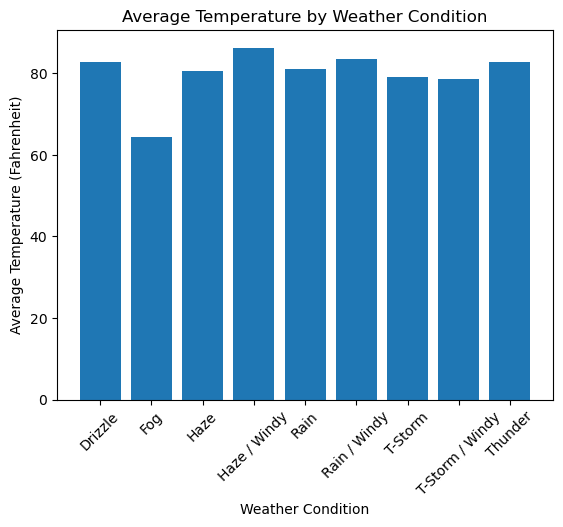

In [52]:
avg_temp_by_condition = df.groupby('condition')['temperature_fahrenheit'].mean()
plt.bar(avg_temp_by_condition.index, avg_temp_by_condition.values)
plt.title('Average Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Temperature (Fahrenheit)')
plt.xticks(rotation=45)
plt.show()

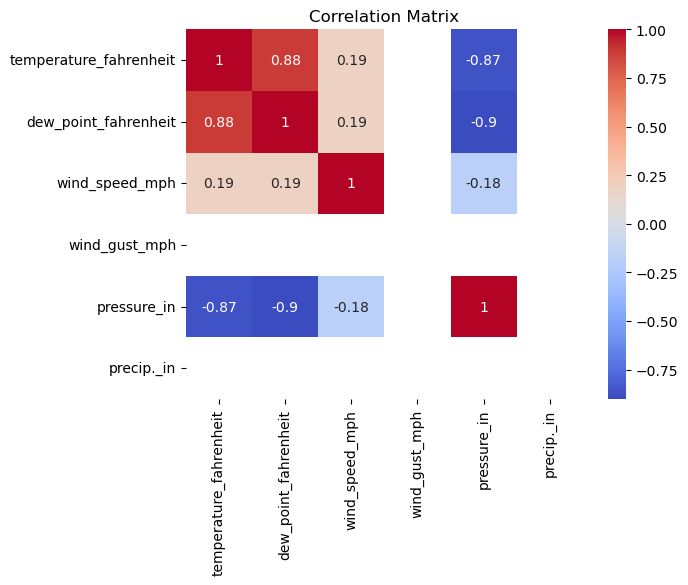

In [53]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

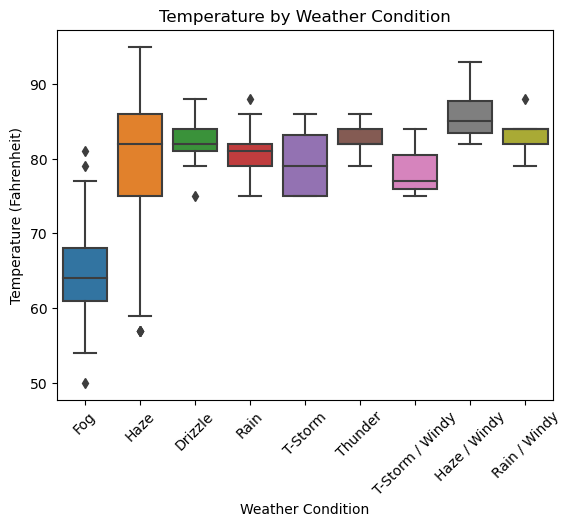

In [54]:
sns.boxplot(x='condition', y='temperature_fahrenheit', data=df)
plt.title('Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (Fahrenheit)')
plt.xticks(rotation=45)
plt.show()

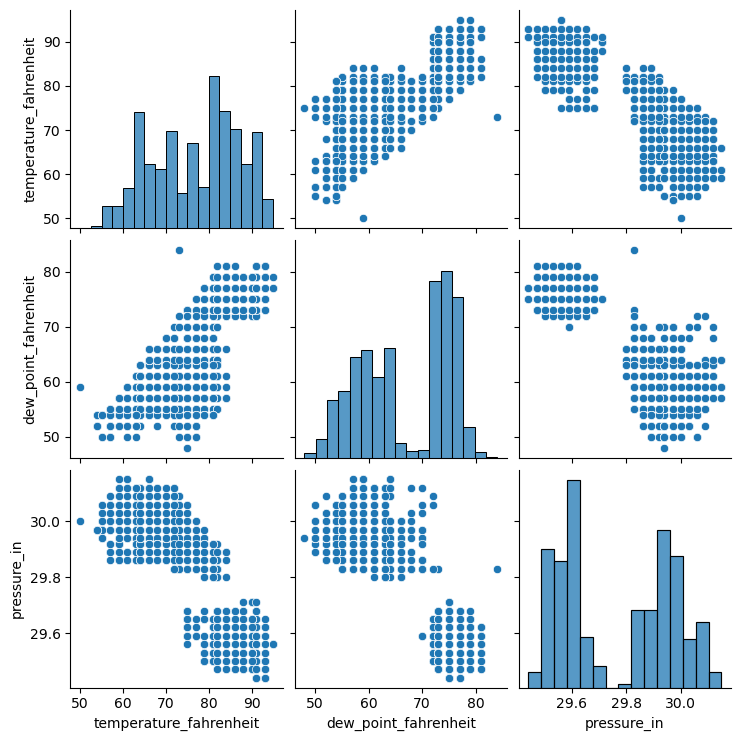

In [55]:
sns.pairplot(df[['temperature_fahrenheit', 'dew_point_fahrenheit', 'pressure_in']])
plt.show()

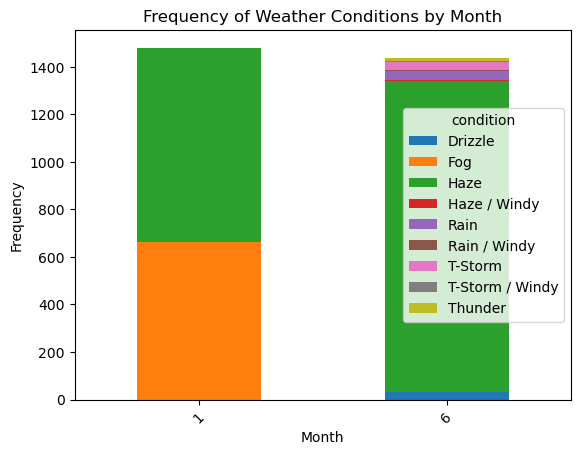

In [56]:

df['month'] = pd.to_datetime(df['date']).dt.month
condition_by_month = df.groupby(['month', 'condition'])['date'].count().unstack()
condition_by_month.plot(kind='bar', stacked=True)
plt.title('Frequency of Weather Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

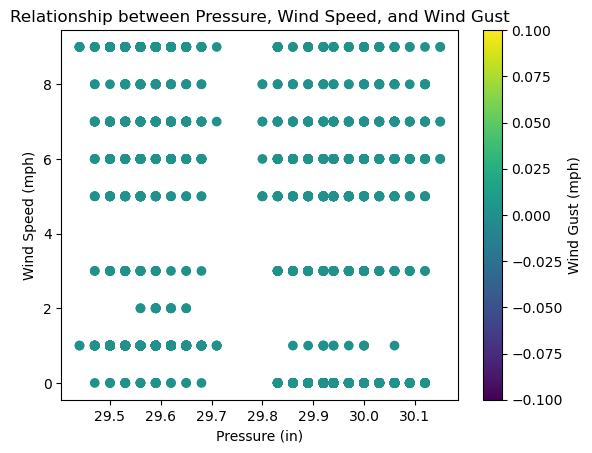

In [57]:
plt.scatter(df['pressure_in'], df['wind_speed_mph'], c=df['wind_gust_mph'])
plt.title('Relationship between Pressure, Wind Speed, and Wind Gust')
plt.xlabel('Pressure (in)')
plt.ylabel('Wind Speed (mph)')
plt.colorbar(label='Wind Gust (mph)')
plt.show()

In [58]:
fig = px.line(df, x='date', y=['temperature_fahrenheit', 'dew_point_fahrenheit', 'pressure_in'])
fig.update_layout(title='Time Series of Temperature, Dew Point, and Pressure in Dhaka',
                   xaxis_title='Date',
                   yaxis_title='Value',
                   legend_title='Variable')
fig.show()

In [59]:
fig = px.scatter(df, x='temperature_fahrenheit', y='dew_point_fahrenheit', color='condition', size='pressure_in', hover_name='date')
fig.update_layout(title='Relationship between Pressure, Wind Speed, and Wind Gust by Weather Condition in Dhaka',
                  xaxis_title='Pressure (in)',
                  yaxis_title='Wind Speed (mph)')
fig.show()

In [60]:
# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder(sparse=False)

# Encode the wind column using OneHotEncoder
wind_encoded = onehot_encoder.fit_transform(df[['wind']])

# Create a new dataframe with the encoded wind column
wind_encoded_df = pd.DataFrame(wind_encoded, columns=onehot_encoder.get_feature_names(['wind']))

# Merge the wind_encoded_df with the original dataframe and drop the original wind column
data = pd.concat([df, wind_encoded_df], axis=1)
data.drop('wind', axis=1, inplace=True)

In [61]:
# Create an instance of the LabelEncoder class
label_encoder = LabelEncoder()

# Encode the condition column using LabelEncoder
condition_encoded = label_encoder.fit_transform(data['condition'])

# Add the encoded condition column to the original dataframe
data['condition_encoded'] = condition_encoded

# Drop the original condition column
data.drop('condition', axis=1, inplace=True)

In [62]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce')

# Convert 'time' column to datetime format
data['time'] = data['time'].replace('0:00:00', np.nan)
data['time'] = pd.to_datetime(data['time'], format='%I:%M:%S %p', errors='coerce').dt.time

In [63]:
data['humidity_percentage'] = data['humidity_percentage'].astype(int)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1143 non-null   datetime64[ns]
 1   time                    0 non-null      datetime64[ns]
 2   temperature_fahrenheit  2917 non-null   int64         
 3   dew_point_fahrenheit    2917 non-null   int64         
 4   humidity_percentage     2917 non-null   int64         
 5   wind_speed_mph          2917 non-null   int64         
 6   wind_gust_mph           2917 non-null   int64         
 7   pressure_in             2917 non-null   float64       
 8   precip._in              2917 non-null   int64         
 9   month                   2917 non-null   int64         
 10  wind_CALM               2917 non-null   float64       
 11  wind_E                  2917 non-null   float64       
 12  wind_ENE                2917 non-null   float64 

In [65]:
# Separate dataset into X and y
X = data.drop(['date', 'time', 'condition_encoded'], axis=1)
y = data['condition_encoded']

In [66]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Create a logistic regression model
lr = LogisticRegression(random_state=42)

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.932648401826484
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.91      0.94      0.93       181
           2       0.96      0.97      0.96       660
           3       0.00      0.00      0.00         1
           4       0.20      0.25      0.22         8
           6       0.40      0.18      0.25        11
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.93       876
   macro avg       0.31      0.29      0.30       876
weighted avg       0.92      0.93      0.92       876



In [68]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9440639269406392
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20        10
           1       0.94      0.94      0.94       181
           2       0.96      0.97      0.97       660
           3       0.00      0.00      0.00         1
           4       0.70      0.88      0.78         8
           6       1.00      0.36      0.53        11
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.94       876
   macro avg       0.48      0.42      0.43       876
weighted avg       0.94      0.94      0.94       876



In [69]:
# Create a Support Vector Machines classifier
svc = SVC(random_state=42)

# Train the model on the training data
svc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8938356164383562
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.80      0.82      0.81       181
           2       0.92      0.96      0.94       660
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.89       876
   macro avg       0.21      0.22      0.22       876
weighted avg       0.86      0.89      0.88       876



In [70]:
# Perform PCA
pca = PCA(n_components=len(X.columns))
pca.fit(X)
X_pca = pca.transform(X)

# Split the data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
y_pred_pca = rf.predict(X_test_pca)

# Calculate the accuracy score
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print('Accuracy:', accuracy_pca)

Accuracy: 0.9429223744292238


In [76]:
!pip3 install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 721.2 kB/s eta 0:00:0000:0100:01


In [77]:
from xgboost import XGBClassifier
xgb_hype = XGBClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_grid = GridSearchCV(estimator=xgb_hype, param_grid=param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

print('Best parameters:', xgb_grid.best_params_)
print('Best score:', xgb_grid.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.9470851910446332


In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
}

param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

# Define the AdaBoost classifier
ada = AdaBoostClassifier(base_estimator=base_estimator)

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)


Accuracy: 93.72%
Best Hyperparameters:  {'learning_rate': 1, 'n_estimators': 500}


In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter space
param_dist = {
    'n_estimators': range(100, 501, 50),
    'learning_rate': uniform(0.01, 0.5),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create an AdaBoostClassifier object
abc_hype = AdaBoostClassifier(random_state=42)

# Create a RandomizedSearchCV object
abc_random = RandomizedSearchCV(
    estimator=abc_hype, 
    param_distributions=param_dist, 
    n_iter=100, 
    cv=5, 
    random_state=42
)

# Fit the model with training data
abc_random.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print('Best parameters:', abc_random.best_params_)
print('Best score:', abc_random.best_score_)


Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.2259725093210579, 'n_estimators': 100}
Best score: 0.9284709238218515


In [84]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter space
param_dist = {
    'max_depth': range(3, 10),
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': range(100, 501, 50),
    'gamma': uniform(0, 1),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Create an XGBClassifier object
xgb_hype = xgb.XGBClassifier(random_state=42)

# Create a RandomizedSearchCV object
xgb_random = RandomizedSearchCV(
    estimator=xgb_hype, 
    param_distributions=param_dist, 
    n_iter=100, 
    cv=5, 
    random_state=42
)

# Fit the model with training data
xgb_random.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print('Best parameters:', xgb_random.best_params_)
print('Best score:', xgb_random.best_score_)


Best parameters: {'colsample_bytree': 0.7137705091792748, 'gamma': 0.02541912674409519, 'learning_rate': 0.06394571349665222, 'max_depth': 9, 'n_estimators': 400, 'reg_alpha': 0.47537022318211175, 'reg_lambda': 0.5632755719763837, 'subsample': 0.8477580432130638}
Best score: 0.9480607891078192
